In [1]:
import pandas as pd
import numpy as np


In [81]:
df_raw = pd.read_csv('//home/alex/Projects/RL_trade_ES_futures/new_data.csv') 

In [82]:
df_raw.head()

,date,open,high,low,close,volume,average,barCount,hours,minutes,...,roll_min_cp,roll_max_vol,vol/max_vol,EMA_9-EMA_26,EMA_200-EMA_50,B_upper,B_middle,B_lower,ES_C_close,ES_P_close
0,2020-10-23 01:19:00,3446.50,3447.00,3446.25,3446.50,96.0,3446.625,51.0,1.0,19.0,...,3441.0,880.0,0.109091,0.029117,4.695626,3447.089762,3445.889762,3444.689762,68.250,16.750
1,2020-10-23 01:20:00,3446.50,3447.00,3446.25,3446.25,147.0,3446.600,74.0,1.0,20.0,...,3441.0,880.0,0.167045,0.099427,4.645922,3447.281956,3446.081956,3444.881956,68.000,16.750
2,2020-10-23 01:21:00,3446.25,3446.25,3445.25,3445.50,111.0,3445.725,48.0,1.0,21.0,...,3441.0,880.0,0.126136,0.055592,4.618779,3447.337476,3446.137476,3444.937476,67.625,17.000
3,2020-10-23 01:22:00,3445.25,3445.75,3444.75,3445.00,138.0,3445.175,68.0,1.0,22.0,...,3441.0,880.0,0.156818,-0.040666,4.605790,3447.223397,3446.023397,3444.823397,67.125,17.125
4,2020-10-23 01:23:00,3445.00,3445.50,3445.00,3445.00,104.0,3445.075,50.0,1.0,23.0,...,3441.0,880.0,0.118182,-0.111365,4.591637,3447.060788,3445.811788,3444.562788,67.125,17.125


In [83]:
df = df_raw[['close','EMA_9','EMA_26']]

In [84]:
df_raw['dev_1'] = np.gradient(df_raw['EMA_9'])
df_raw['dev_2'] = np.gradient(df_raw['dev_1'])

<AxesSubplot:>

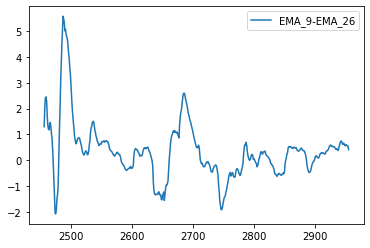

In [89]:
df_raw[['EMA_9-EMA_26']][-500:].plot()

In [65]:
df_raw['dev_1_26'] = np.gradient(df_raw['EMA_'])

<AxesSubplot:>

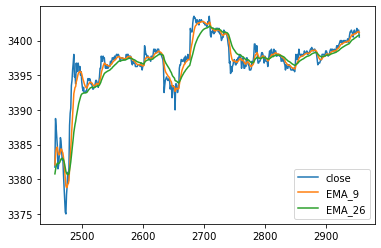

In [90]:
df[['close','EMA_9','EMA_26']][-500:].plot()

In [ ]:
x

In [ ]:
x = pd.Series(np.diff(x))

In [ ]:
x[:10]

In [ ]:
g = np.diff(x)
plt.plot(g)

In [ ]:
x[:25].plot()
plt.plot(g[:25])
plt.legend()

In [ ]:
from matplotlib import pyplot as plt 
%matplotlib inline 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()

C= m.fit_transform(C.values.reshape(-1,1))
E9= m.fit_transform(E9.values.reshape(-1,1))

In [ ]:
plt.plot(C, label = 'l1')
plt.plot(x, label = 'l2')
plt.plot(E9, label = 'l3')
plt.legend()

In [ ]:
x.plot()

In [ ]:
c.plot()

In [ ]:
E9 =df['EMA_9'][-100:].reset_index(drop = True)
C = df['close'][-100:].reset_index(drop = True)

In [ ]:
c

In [93]:
df.columns

Index(['close', 'EMA_9', 'EMA_26'], dtype='object')

In [97]:
print('checking ATR and max_vol roll period')
var_ret = {}
var = 0.25
df = df_raw[['high', 'low', 'volume', 'close', 'RSI', 'ATR', 'roll_max_cp', 'roll_min_cp',
             'roll_max_vol', 'EMA_9-EMA_26','dev_1', 'ES_C_close','ES_P_close']]
buy_index = []
sell_index = []
stock_owned = np.zeros(2)
var_ret = {}
while var != 5:
    ret = []
    for i in range(1,len(df)):
        if df["EMA_9-EMA_26"].iloc[i] > 1 and df["EMA_9-EMA_26"].iloc[i-1] > df["EMA_9-EMA_26"].iloc[i] and \
                buy_index == [] and stock_owned[0] == 0 and stock_owned[1] == 0:

            tickers_signal = "Buy call"
            buy_index.append(0)
            stock_owned = [1, 0]

        elif df["EMA_9-EMA_26"].iloc[i] < 1 and df["EMA_9-EMA_26"].iloc[i-1] < df["EMA_9-EMA_26"].iloc[i] and \
                buy_index == [] and stock_owned[0] == 0 and stock_owned[1] == 0:

            tickers_signal = "Buy put"
            buy_index.append(1)
            stock_owned = [0, 1]

        elif (df["dev_1"].iloc[i] < df["dev_1"].iloc[i - 1] and df["dev_1"].iloc[i] < df["dev_1"].iloc[i - 2] and df["dev_1"].iloc[i] < df["dev_1"].iloc[i - 3] and df["dev_1"].iloc[i] < df["dev_1"].iloc[i - 4]) and stock_owned[0] == 1 and stock_owned[1] == 0:
            tickers_signal = "sell call"
            sell_index.append(0)
            stock_owned = [0, 0]


        elif (df["dev_1"].iloc[i] > df["dev_1"].iloc[i - 1] and df["dev_1"].iloc[i] > df["dev_1"].iloc[i - 2] and df["dev_1"].iloc[i] > df["dev_1"].iloc[i - 3] and df["dev_1"].iloc[i] > df["dev_1"].iloc[i - 4]) and stock_owned[0] == 0 and stock_owned[1] == 1:
            tickers_signal = "sell put"
            sell_index.append(1)
            stock_owned = [0, 0]
        else:
            tickers_signal = "Hold"
            sell_index = []
            buy_index = []
            if stock_owned[0] != 0:
                ret.append(df['ES_C_close'][i] - df['ES_C_close'][i - 1])
            elif stock_owned[1] != 0:
                ret.append(df['ES_P_close'][i] - df['ES_P_close'][i - 1])
            else:
                ret.append(0)

    print(f'var = {var}, returns = {sum(ret) * 50}')
    var_ret[str(var)] = sum(ret) * 50
    var += 0.25

ATR = max(var_ret, key=var_ret.get)
print('Max ATR is at', ATR)
vol_var = 5
var_ret = {}

checking ATR and max_vol roll period
var = 0.25, returns = 10425.0
var = 0.5, returns = 10425.0
var = 0.75, returns = 10425.0
var = 1.0, returns = 10425.0
var = 1.25, returns = 10425.0
var = 1.5, returns = 10425.0
var = 1.75, returns = 10425.0
var = 2.0, returns = 10425.0
var = 2.25, returns = 10425.0
var = 2.5, returns = 10425.0
var = 2.75, returns = 10425.0
var = 3.0, returns = 10425.0
var = 3.25, returns = 10425.0
var = 3.5, returns = 10425.0
var = 3.75, returns = 10425.0
var = 4.0, returns = 10425.0
var = 4.25, returns = 10425.0
var = 4.5, returns = 10425.0
var = 4.75, returns = 10425.0
Max ATR is at 0.25


In [57]:
print('checking ATR and max_vol roll period')
var_ret = {}
var = 0.25
df = df[
    ['high', 'low', 'close', 'volume', 'roll_max_vol','dev_1', 'roll_max_cp', 'roll_min_cp', 'ATR', 'ES_C_close',
     'ES_P_close']]
buy_index = []
sell_index = []
stock_owned = np.zeros(2)
var_ret = {}
while var != 5:
    ret = []
    for i in range(1,len(df)):
        if df["high"].iloc[i] >= df["roll_max_cp"].iloc[i - 1] and \
                df["volume"].iloc[i] > df["roll_max_vol"].iloc[i - 1] and \
                buy_index == [] and stock_owned[0] == 0 and stock_owned[1] == 0:

            tickers_signal = "Buy call"
            buy_index.append(0)
            stock_owned = [1, 0]

        elif df["low"].iloc[i] <= df["roll_min_cp"].iloc[i - 1] and \
                df["volume"].iloc[i] > df["roll_max_vol"].iloc[i - 1] and \
                buy_index == [] and stock_owned[0] == 0 and stock_owned[1] == 0:

            tickers_signal = "Buy put"
            buy_index.append(1)
            stock_owned = [0, 1]

#         elif df["low"].iloc[i] <= df["roll_min_cp"].iloc[i - 1] and df["volume"].iloc[i] > \
#                 df["roll_max_vol"].iloc[i - 1] and stock_owned[0] == 1 and stock_owned[1] == 0:
#             tickers_signal = "sell call and buy puts"
#             sell_index.append(0)
#             buy_index.append(1)
#             stock_owned = [0, 1]


#         elif df["high"].iloc[i] >= df["roll_max_cp"].iloc[i - 1] and df["volume"].iloc[i] > \
#                 df["roll_max_vol"].iloc[i - 1] and stock_owned[1] == 1 and stock_owned[0] == 0:
#             tickers_signal = "sell put and buy calls"
#             sell_index.append(1)
#             buy_index.append(0)
#             stock_owned = [1, 0]

        elif (df["dev_1"].iloc[i] < df["dev_1"].iloc[i - 1] and df["dev_1"].iloc[i] < df["dev_1"].iloc[i - 2] and df["dev_1"].iloc[i] < df["dev_1"].iloc[i - 3] and df["dev_1"].iloc[i] < df["dev_1"].iloc[i - 4]) and stock_owned[0] == 1 and stock_owned[1] == 0:
            tickers_signal = "sell call"
            sell_index.append(0)
            stock_owned = [0, 0]


        elif (df["dev_1"].iloc[i] > df["dev_1"].iloc[i - 1] and df["dev_1"].iloc[i] > df["dev_1"].iloc[i - 2] and df["dev_1"].iloc[i] > df["dev_1"].iloc[i - 3] and df["dev_1"].iloc[i] > df["dev_1"].iloc[i - 4]) and stock_owned[0] == 0 and stock_owned[1] == 1:
            tickers_signal = "sell put"
            sell_index.append(1)
            stock_owned = [0, 0]
        else:
            tickers_signal = "Hold"
            sell_index = []
            buy_index = []
            if stock_owned[0] != 0:
                ret.append(df['ES_C_close'][i] - df['ES_C_close'][i - 1])
            elif stock_owned[1] != 0:
                ret.append(df['ES_P_close'][i] - df['ES_P_close'][i - 1])
            else:
                ret.append(0)

    print(f'var = {var}, returns = {sum(ret) * 50}')
    var_ret[str(var)] = sum(ret) * 50
    var += 0.25

ATR = max(var_ret, key=var_ret.get)
print('Max ATR is at', ATR)
vol_var = 5
var_ret = {}

checking ATR and max_vol roll period
var = 0.25, returns = 2387.5
var = 0.5, returns = 2387.5
var = 0.75, returns = 2387.5
var = 1.0, returns = 2387.5
var = 1.25, returns = 2387.5
var = 1.5, returns = 2387.5
var = 1.75, returns = 2387.5
var = 2.0, returns = 2387.5
var = 2.25, returns = 2387.5
var = 2.5, returns = 2387.5
var = 2.75, returns = 2387.5
var = 3.0, returns = 2387.5
var = 3.25, returns = 2387.5
var = 3.5, returns = 2387.5
var = 3.75, returns = 2387.5
var = 4.0, returns = 2387.5
var = 4.25, returns = 2387.5
var = 4.5, returns = 2387.5
var = 4.75, returns = 2387.5
Max ATR is at 0.25
